Transcriptomes
==============

RNAvigate has some functionality to extract transcript-coordinate data from
genomic-coordinate data files.

In [7]:
import rnavigate as rnav


Transcripts
-----------

First, we need to set up the genome and transcriptome annotations, then we can retreive information about our transcript(s) of interest, here SERPINA1 (Ensembl ID: ENST00000393087.9).

As we'll see later, this `Transcript` object provides useful tools on it's own, and can be used with BED files to extract transcript-coordinate profiles or annotations.


In [8]:
GRCh38 = rnav.transcriptomics.Transcriptome(
    genome="GCF_000001405.26_GRCh38_genomic.fna",
    annotation="MANE.GRCh38.v1.0.ensembl_genomic.gtf"
)

SERPINA1 = GRCh38.get_transcript("ENST00000393087.9")

eCLIP Peaks
-----------

RNAvigate parses BED6 and narrowPeak (BED6+4) files, and includes specific functions to download peak files from the ENCORE eCLIP database.

First, we can use `rnav.transcriptomics.download_eclip_peaks` to retreive the eCLIP peaks from
[ENCORE](https://www.encodeproject.org/encore-matrix/?type=Experiment&status=released&internal_tags=ENCORE).
This downloads one narrowPeak file for each combination of protein target and cell line (K562 and HepG2).
We only need to do this once.
The data can be saved to a central location and reused in other notebooks.

With these files, we can create the eCLIP "database" using `rnav.transcriptomics.eCLIPDatabase`.

To help us to start thinking about this data, we can display all of the proteins that bind SERPINA1. Binding sites will be displayed in transcript coordinates.

In [9]:
eclip_path = "../../../reference_data/eCLIP_downloads"
# rnav.transcriptomics.download_eclip_peaks(outpath=eclip_path)
# rnav.transcriptomics.create_eclip_table(inpath=eclip_path, outpath=eclip_path)
eclip = rnav.transcriptomics.eCLIPDatabase(inpath=eclip_path)

eclip.print_all_peaks(SERPINA1)

K562     AATF     62-145
HepG2    AKAP1    1424-1476 1737-1797 2092-2126 2317-2350
HepG2    DDX3X    2-43 48-91 92-121
K562     DHX30    190-239 309-350 398-467
HepG2    IGF2BP1  156-163 164-185 186-190 191-207 208-216 217-236 237-240 241-248 249-254 255-272 273-280 281-284 285-289 290-299 300-320 321-330 331-360 374-383 905-948 949-964 965-980 981-997 1016-1062
HepG2    IGF2BP3  169-219 220-238 243-248 249-267 270-288 289-299 300-321 322-348 349-366 367-389 397-413 414-443 444-482 912-929 930-952 953-961 962-964 965-968 969-979 980-994 1015-1044 1177-1236 1247-1297
HepG2    ILF3     1426-1466 1741-1811 2250-2338
HepG2    LARP4    1236-1279 1280-1282 1283-1288 1289-1299 1300-1310 1311-1334 1335-1370
HepG2    LIN28B   779-798 799-819
HepG2    NIP7     397-466
HepG2    PCBP1    44-88 89-100 101-106 107-123 124-154 218-253 399-447 1299-1328 1329-1360
HepG2    PCBP2    1299-1325 1326-1330 1331-1395 1412-1452 2134-2143 2144-2173 2243-2251 2252-2285 2286-2302
HepG2    QKI      2525-2624
HepG

Creating annotations and profiles
---------------------------------

We will use the methods of `Transcript` and `eCLIPDatabase` to create annotations and profiles, and assign these directly to data keywords.
We can use any data keywords we like for this assignment.

`eclip.get_eclip_density` will create a per-nucleotide profile.
The value of each nucleotide is the total number of eCLIP peaks overlapping that position.
This can be useful to get a sense of overall protein binding and which regions may be functional protein-binding scaffolds.

`eclip.get_annotation` will create an annotation of protein binding regions for a given protein target and cell line.

`transcript.get_cds_annotation` creates a span annotation to highlight the coding sequence.

`transcript.get_junctions_annotation` creates a span annotation to highlight exon-exon junctions.
Each span is two nucleotides: the 3' end of the 5' exon, and the 5' end of the 3' exon.

`transcript.get_exon_annotation` creates a span annotation to highlight a specified exon.


In [10]:
test = rnav.Sample(
    sample="SERPINA1 mRNA",
    SERPINA1=SERPINA1,
    eCLIP=eclip.get_eclip_density(transcript=SERPINA1, cell_line="HepG2"),
    cds=SERPINA1.get_cds_annotation(color="red"),
    ddx3x=eclip.get_annotation(SERPINA1, "HepG2", "DDX3X", color="blue"),
    junctions=SERPINA1.get_junctions_annotation(color="black"),
    exon3=SERPINA1.get_exon_annotation(3),
)

Plotting
--------

With these profiles and annotations, we can start creating plots.

For example, here a profile of eCLIP peak density over SERPINA1.

- red bar: coding sequence
- blue bars: DDX3X binding regions (in the 5' UTR)

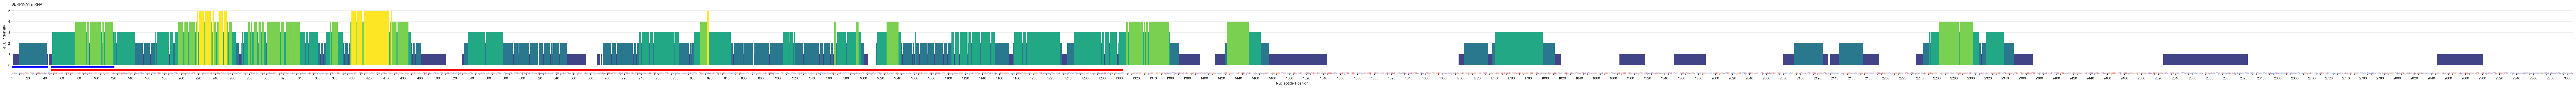

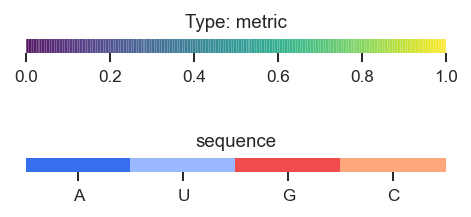

In [11]:
plot = rnav.plot_profile(
    [test],
    sequence="SERPINA1",
    profile="eCLIP",
    annotations=["cds", "ddx3x"],
)
